Seaborn是针对统计绘图的，一般能满足数据分析90%的绘图要求，可以把Seaborn视为matplotlib的补充，而不是替代物！
使用matplotlib最大的困难是其默认的各种参数，而Seaborn则完全避免了这一问题。

seaborn一共有5个大类21种图，分别是：
+ Relational plots　关系类图表
+ Categorical plots 分类图表
+ Distribution plot 分布图
+ Regression plots　回归图
+ Matrix plots 矩阵图

## Seaborn简明教程 

In [54]:
# 参考链接http://www.lunarnai.cn/2017/07/24/seaborn/
# seaborn内置样例数据
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 8.0) # 设置绘图显示大小
# 查看数据格式  
df = pd.read_csv('./data/Pokemon.csv', index_col=0, encoding='cp1252')
df.head()
# print(df)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


### 简单绘图

下面我们利用seaborn的的**lmplot函数来绘制最基本的散点图**。
下面给出了两种方式:
1. 将数据集(DataFrame结构)传递给data参数，同时将列名传递给轴参数:x and y
2. 直接将一些列数据传递给轴参数

第一种式更为推荐，因为不会出现x和y长度不一的情况。

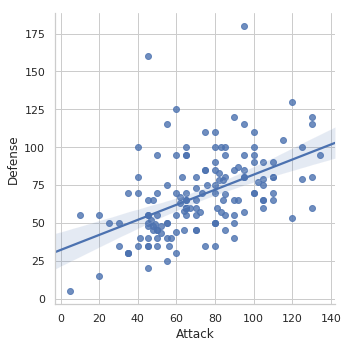

In [64]:
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 8.0) # 设置绘图显示大小
# 推荐方式
sns.lmplot(x='Attack', y='Defense', data=df)
# 也可以这样
# sns.lmplot(x=df.Attack, y=df.Defense)

这里我们可以看到，这张图中自动生成了一条拟合直线，但是这在我们的数据集中没有意义，通过设置fit_reg=False移除掉拟合曲线。同时我们想根据宠物小精灵的阶段(‘Stage’字段)**给散点染色**，这时只要简单的设置两个参数如下：

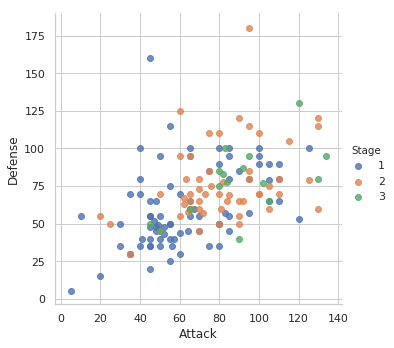

In [56]:
# hue, col, row : **strings**.
# Variables that define subsets of the data, which will be drawn on separate facets in the grid.
sns.lmplot(x='Attack', y='Defense', data=df, 
           fit_reg=False, 
           hue='Stage')

### 利用matplotlib调整图像 

前面说过了，seaborn是matplotlib的高阶接口，也就是我们利用seaborn生成的图表也能用matplotlib进行调整。
例如，我们可以看到上图x/y轴的起点都不是0，而我们的数值（攻击力和防御力）必然都是非负的?

同时我们又想给这张表加个标题。这时我们就可以利用matplotlib来做相应调整。

Text(0.5, 1.0, 'Attack&Defense of Pokemons')

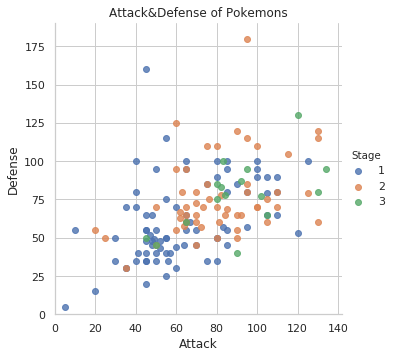

In [57]:
# 绘图
sns.lmplot(x='Attack', y='Defense', data=df, 
           fit_reg=False, 
           hue='Stage')
# 调整
plt.xlim(0, None)    # Get or set the x limits of the current axes.
plt.ylim(0, None)
plt.title('Attack&Defense of Pokemons')

### 加上pandas更好用 

我们知道pandas是一个炒鸡好用的处理数据的模块，在用seaborn绘图时，我们加上pandas能够事半功倍。

例如我们想绘制一个**箱式图**，seaborn的默认图是这样的：

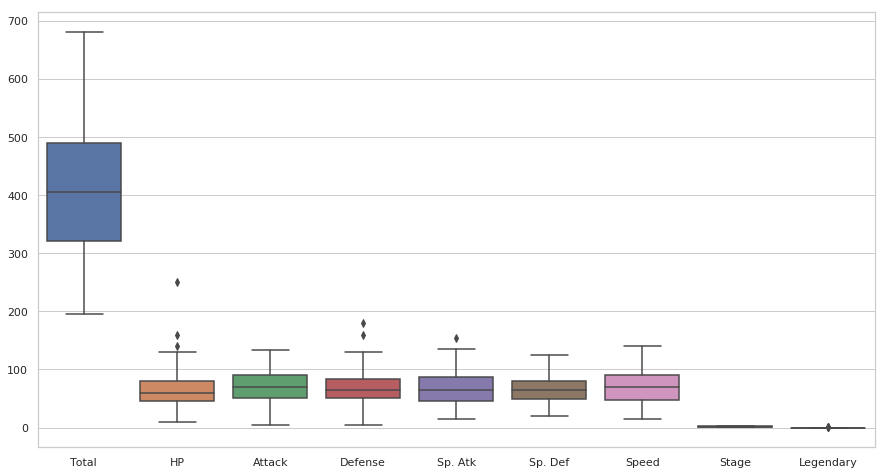

In [58]:
sns.boxplot(data=df)
# # 查看数据格式  
# df2 = pd.read_csv('./data/train.csv', index_col=0, encoding='cp1252')
# df2.head()
# sns.boxplot(data=df2)

使用默认的df数据绘制的箱式图，虽然能看出一些东西，但实际上一些cloumns: total，Stage和Legendary都没有意义，因此使用pandas函数创建新的DataFrame变得有必要了。

df.drop函数使用:

**Signature**: df.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')

**Docstring**:
Drop specified labels from rows or columns.
参数解释:
+ labels: 单独的label或者类似列表的数据(包含要删除的Index或者column labels)
+ axis: 从index(0 or 'index)或者columns(1 or 'columns)中根据labels删除
+ level:略

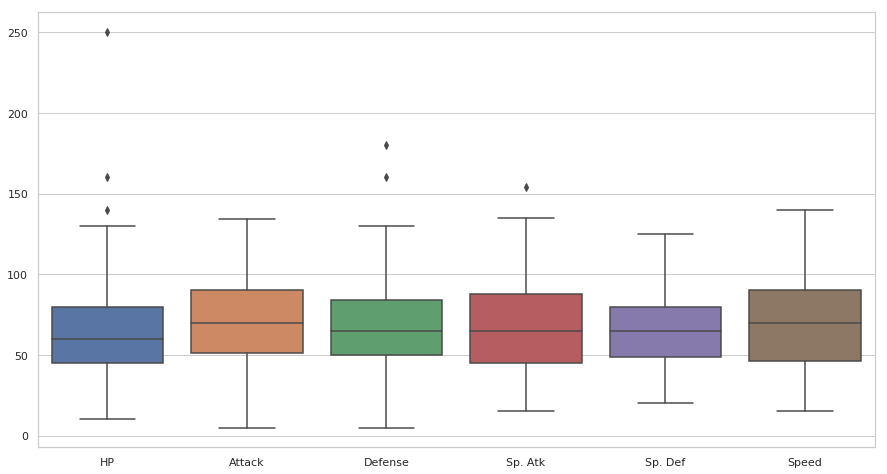

In [59]:
# 创建新的DataFrame，舍去无用字段
# df.drop 
# Remove rows or columns by specifying label names and corresponding axis, 
# or by specifying directly index or column names
status_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
# status_df = df.drop([1, 2], axis=0)
sns.boxplot(data=status_df)

###  淡妆浓抹 主题和颜色

为了使图表更加美观，seaborn提供了5种内置的主题，分别是`darkgrid`, `whitegrid`, `dark`, `white`和`ticks`。通过set_style函数就可以设置。

我们也可以设置自定义颜色，包括自定义循环色，渐变色等，具体可以参见[文档](https://seaborn.pydata.org/tutorial/color_palettes.html)

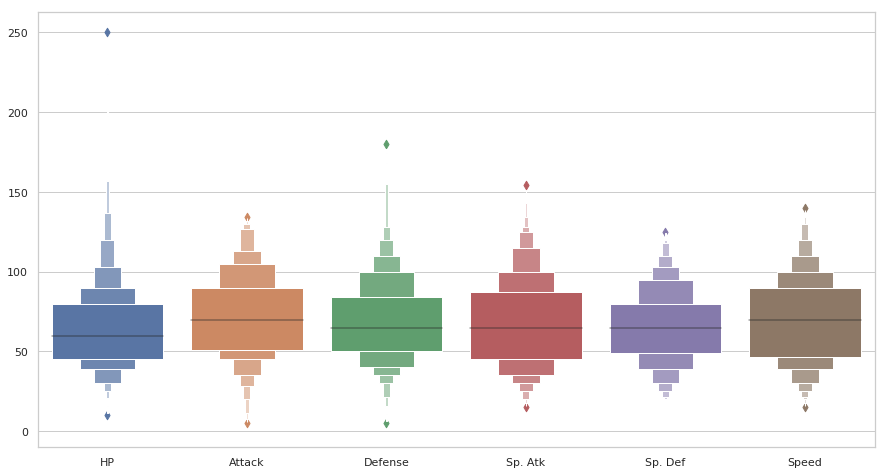

In [63]:
sns.set_style('whitegrid')
sns.boxenplot(data=status_df)

         Name Type 1  Type 2  Total  ...  Sp. Def  Speed  Stage  Legendary
#                                    ...                                  
1   Bulbasaur  Grass  Poison    318  ...       65     45      1      False
2     Ivysaur  Grass  Poison    405  ...       80     60      2      False
3    Venusaur  Grass  Poison    525  ...      100     80      3      False
4  Charmander   Fire     NaN    309  ...       50     65      1      False
5  Charmeleon   Fire     NaN    405  ...       65     80      2      False

[5 rows x 12 columns]


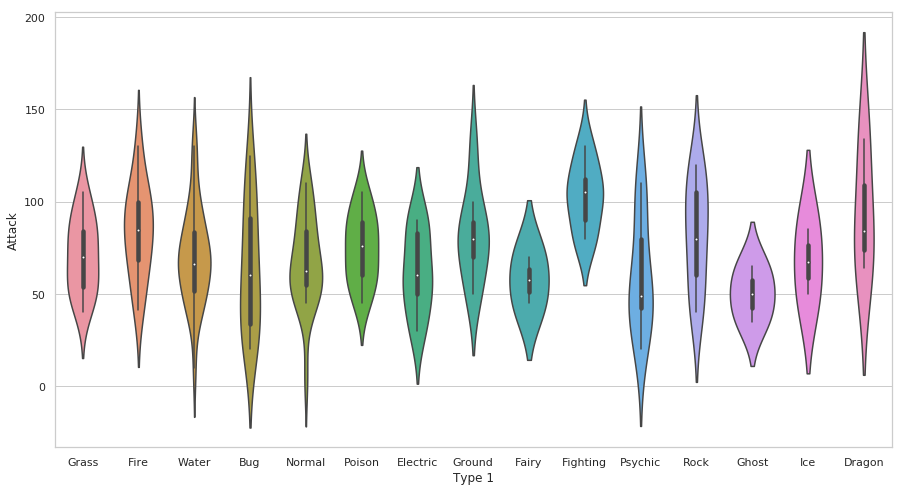

In [72]:
# Set theme
sns.set_style('whitegrid')
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 8.0) # 设置绘图显示大小
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df)
print(df.head())

palette : palette name, list, or dict, optional.
***
    Colors to use for the different levels of the ``hue`` variable. Should
    be something that can be interpreted by :func:`color_palette`, or a
    dictionary mapping hue levels to matplotlib colors.

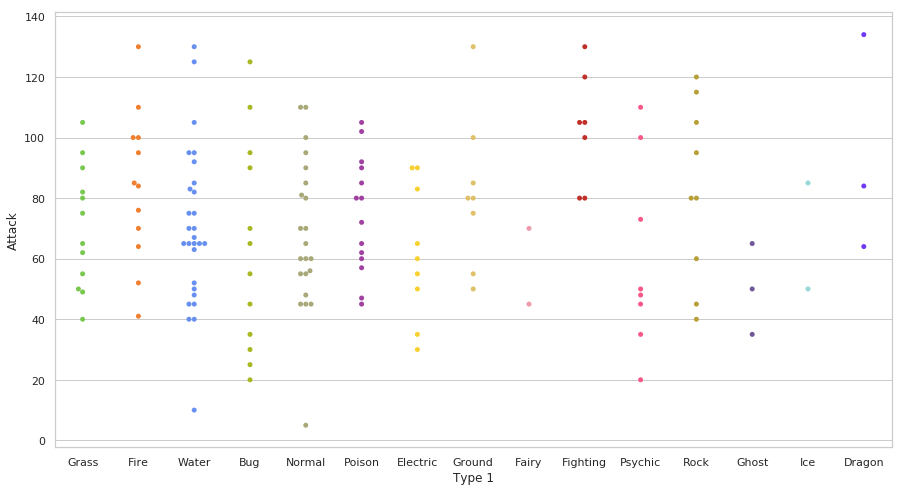

In [70]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
# 带密度分布的散点图
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

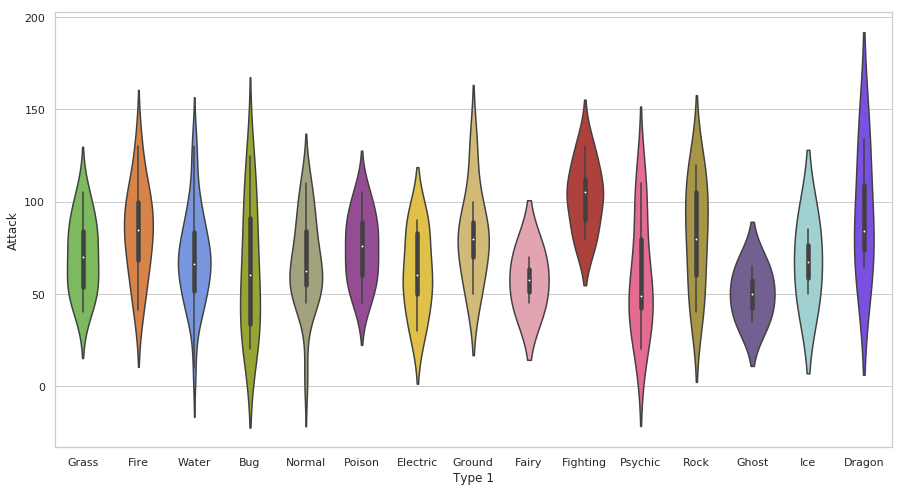

In [74]:
# 使用platte=参数来重新为绘图着色
# Violin plot with Pokemon color palette
# sns.violinplot函数绘制箱线图和核密度估计图的组合
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette

## 风格管理-绘图风格设置 

In [21]:
# %matlpotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(sum(map(ord, 'ereferfrfger')))

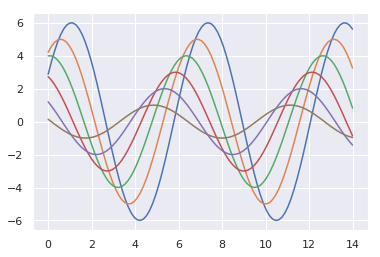

In [22]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i*0.5)*(7-i)*flip)
sinplot()

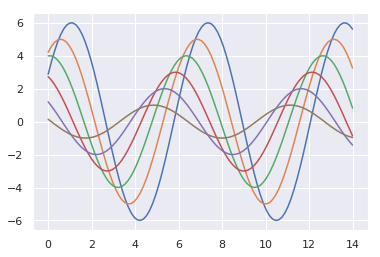

In [17]:
# 转换为seaborn默认绘图
sns.set()
sinplot()

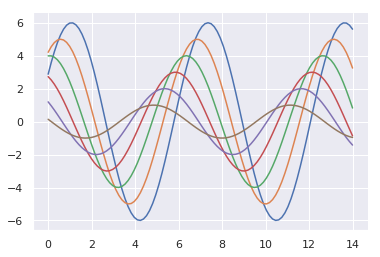

In [19]:
# 移除轴脊柱
sinplot()
sns.despine()

Seaborn 将 matplotlib 的参数划分为两个独立的组合。第一组是设置绘图的外观风格的，第二组主要将绘图的各种元素按比例缩放的，以至可以嵌入到不同的背景环境中。

操控这些参数的接口主要有两对方法：

+ 控制风格：axes_style(), set_style()
+ 缩放绘图：plotting_context(), set_context()

每对方法中的第一个方法（axes_style(), plotting_context()）会返回一组字典参数，而第二个方法（set_style(), set_context()）会设置matplotlib的默认参数。

### Seaborn的五种绘图风格

有五种seaborn的风格，它们分别是：**darkgrid, whitegrid, dark, white, ticks**。它们各自适合不同的应用和个人喜好。默认的主题是darkgrid。

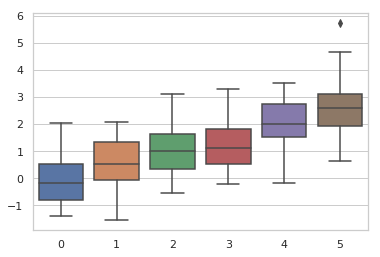

In [16]:
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data)